# Exploratory Data Analysis (EDA)

This notebook I will be using visualizations to dive into different aspects of our dataframe. We will be mainly looking at our target variable "PER Improvement" and its relationships with other features 

In [1]:
#Importing all the tools and modules I might need
import os


import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import norm



c:\Users\ivant\anaconda3\envs\capstone\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ivant\anaconda3\envs\capstone\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
c:\Users\ivant\anaconda3\envs\capstone\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
numerical_df = pd.read_csv("numerical_df.csv")
pd.set_option('display.max_columns', None) 

In [3]:
#Data Understanding

numerical_df

,Player,Age,G,GS,MP,FG%,3PA,3P%,2PA,2P%,eFG%,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,team,season,Pos,Ht,Wt,Exp,PER,TS%,3PAr,AST%,STL%,BLK%,TOV%,USG%,OWS,WS,WS/48,BPM,OBPM,VORP,TRB%,Ht_cm,grouped_Pos,Pos type dummy_C,Pos type dummy_F,Pos type dummy_G,Previous PER average,Previous PER Improvement,Previous PER Improvement Average,Previous OBPM Improvement,Previous OBPM average,Previous OBPM Improvement Average,Previous TS% average,Previous PTS average,Previous USG% Improvement,Previous USG% average,Previous 3PAr average,Previous FG% average,PER Improvement
0,A.C. Green,23.0,79.0,72.0,28.4,0.538,0.1,0.000,7.4,0.543,0.538,3.6,0.780,2.7,7.8,1.1,0.9,1.0,1.3,2.2,10.8,LAL,1987/1988,PF,6-9,220.0,1.0,15.7,0.599,0.009,4.6,1.5,2.0,12.5,14.7,4.3,7.6,0.163,1.0,0.9,1.7,15.3,205.74,F,0.0,1.0,0.0,13.986667,1.2,0.300000,0.5,0.006667,0.206667,0.539867,9.453333,0.0,14.540000,0.054467,0.481200,-1.2
1,A.C. Green,24.0,82.0,64.0,32.1,0.503,0.0,0.000,7.8,0.505,0.503,4.6,0.773,3.0,8.7,1.1,1.1,0.5,1.5,2.5,11.4,LAL,1988/1989,PF,6-9,220.0,2.0,14.5,0.581,0.003,4.5,1.6,1.0,12.9,14.7,4.5,7.9,0.144,0.3,0.4,1.5,15.3,205.74,F,0.0,1.0,0.0,13.950000,-3.3,0.235714,-1.4,-0.021429,0.185714,0.536929,9.314286,-2.3,14.528571,0.058143,0.479643,3.3
2,A.C. Green,25.0,82.0,82.0,30.6,0.529,0.2,0.235,9.0,0.536,0.532,4.4,0.786,3.1,9.0,1.3,1.1,0.7,1.5,2.1,13.3,LAL,1989/1990,PF,6-9,220.0,3.0,17.8,0.594,0.022,5.5,1.8,1.2,11.5,17.0,5.8,9.4,0.179,1.6,1.8,2.3,16.4,205.74,F,0.0,1.0,0.0,13.653846,3.1,0.507692,1.5,-0.161538,0.307692,0.532538,9.007692,-0.1,14.338462,0.060923,0.475846,-3.1
3,A.C. Green,26.0,82.0,82.0,33.0,0.478,0.6,0.283,9.3,0.489,0.486,4.5,0.751,3.2,8.7,1.1,0.8,0.6,1.4,2.5,12.9,LAL,1990/1991,PF,6-9,220.0,4.0,14.7,0.548,0.057,4.6,1.2,1.1,10.7,17.1,4.4,7.7,0.137,-0.6,0.3,1.0,15.1,205.74,F,0.0,1.0,0.0,13.566667,0.9,0.291667,0.2,-0.200000,0.208333,0.531250,8.683333,1.5,14.108333,0.061250,0.475667,-0.9
4,A.C. Green,27.0,82.0,21.0,26.4,0.476,0.7,0.200,5.9,0.507,0.486,3.7,0.738,2.5,6.3,0.9,0.7,0.3,1.2,1.4,9.1,LAL,1991/1992,PF,6-9,220.0,5.0,13.8,0.556,0.101,4.5,1.4,0.6,12.8,15.6,3.2,6.1,0.135,0.0,0.1,1.1,13.8,205.74,F,0.0,1.0,0.0,13.545455,-2.9,0.236364,-1.6,-0.227273,0.209091,0.529000,8.645455,-1.2,13.972727,0.057636,0.475636,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11389,Žarko Čabarkapa,23.0,37.0,0.0,12.5,0.482,1.0,0.361,3.6,0.515,0.521,1.7,0.813,0.9,2.7,0.7,0.3,0.1,0.8,1.6,6.2,GSW,2005/2006,PF,6-11,235.0,1.0,16.5,0.578,0.212,9.2,1.1,0.8,13.1,21.7,0.8,1.2,0.124,-0.5,0.1,0.2,11.6,210.82,F,0.0,1.0,0.0,16.500000,0.0,0.000000,0.0,0.100000,0.000000,0.578000,6.200000,0.0,21.700000,0.212000,0.482000,-6.6
11390,Željko Rebrača,29.0,74.0,4.0,15.9,0.505,0.0,0.000,5.1,0.505,0.505,2.4,0.771,1.1,3.9,0.5,0.4,1.0,1.1,2.6,6.9,DET,2002/2003,C,7-0,257.0,0.0,16.2,0.569,0.000,5.7,1.3,4.4,15.7,21.4,1.4,3.3,0.134,-2.3,-2.9,-0.1,14.5,213.36,C,1.0,0.0,0.0,12.350000,5.5,1.100000,0.8,-2.700000,-0.600000,0.608500,5.250000,5.9,15.750000,0.000000,0.555000,-2.2
11391,Željko Rebrača,30.0,30.0,12.0,16.3,0.552,0.0,0.000,4.8,0.552,0.552,1.6,0.792,0.9,3.1,0.3,0.2,0.6,1.0,2.6,6.6,DET,2003/2004,C,7-0,257.0,1.0,14.0,0.596,0.000,3.6,0.7,2.6,14.9,19.2,0.7,1.3,0.133,-2.6,-2.8,-0.1,11.2,213.36,C,1.0,0.0,0.0,13.633333,-2.2,0.000000,0.1,-2.766667,-0.366667,0.595333,5.800000,-2.2,17.633333,0.000000,0.538333,-4.4
11392,Željko Rebrača,31.0,21.0,2.0,10.6,0.407,0.0,0.000,2.6,0.407,0.407,1.3,0.786,0.9,2.3,0.2,0.2,0.4,0.6,2.1,3.1,DET,2004/2005,C,7-0,257.0,2.0,9.6,0.498,0.000,3.0,1.2,3.1,16.4,16.7,0.1,0.5,0.115,-3.9,-5.1,-0.1,12.8,213.36,C,1.0,0.0,0.0,13.725000,-4.4,-1.100000,-2.3,-2.775000,-0.850000,0.595500,6.000000,-2.5,18.025000,0.000000,0.541750,4.4


Text(0, 0.5, 'Frequency')

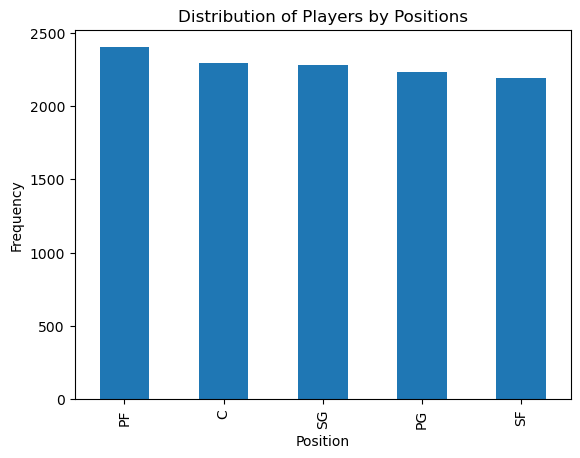

In [4]:
# I want to look at the distribution of the positions of players first
numerical_df['Pos'].value_counts().plot(kind = "bar")
plt.title('Distribution of Players by Positions')
plt.xlabel('Position')
plt.ylabel('Frequency')

The number of players are equally distributed for all 5 positions, which makes sense and is expected.

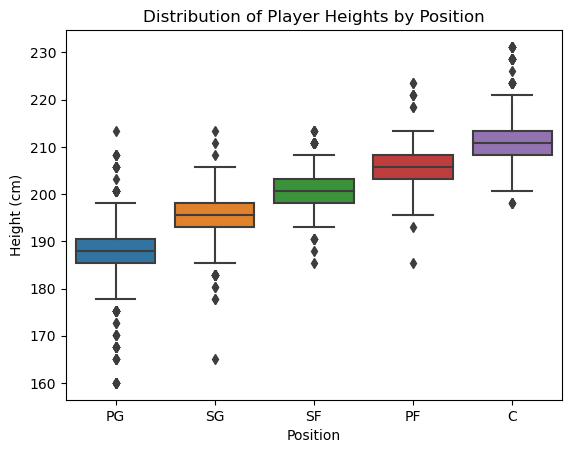

In [5]:
sns.boxplot(x='Pos', y='Ht_cm', data = numerical_df, order = ['PG', 'SG', 'SF', 'PF', 'C'])

# Adding titles and labels
plt.title('Distribution of Player Heights by Position')
plt.xlabel('Position')
plt.ylabel('Height (cm)')

# Displaying the plot
plt.show()

The order of heights by position is PG < SG < SF< PF< C. They all have a normal distribution. Point guards have the lowest median with around 188cm, Shooting guards with around 196cm, Small forwards with around 200cm, Power forwards with around 205cm and Centers with around 210cm.

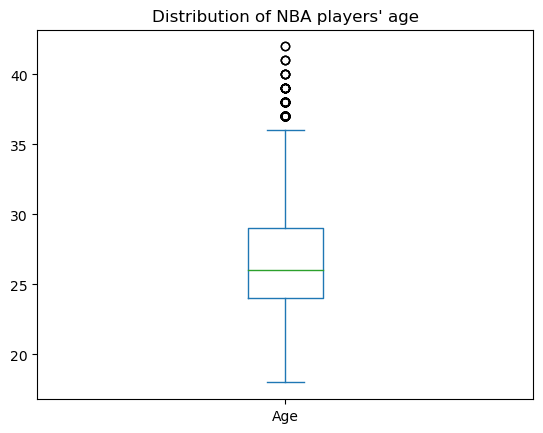

Mean age of NBA players over the years = 26.58144637528524


In [6]:
# Lets dive into the numerical columns and look at the age distribution of the players over the years

plt.figure()
numerical_df["Age"].plot(kind = "box") #I decided to use a box plot for this look at median and interquartile range.
plt.title("Distribution of NBA players' age")
plt.show()
print( "Mean age of NBA players over the years =", numerical_df["Age"].mean())

From our box plot we can see that the mean age of NBA players over the last 3 decades is around 27. The IQR is around 24 to 30, the youngest age is 18 and there are only 2  players with age 40 and above. The box plot is right skewed, so the players are generally quite young. This indicates that in general players are usually best performing from 24 to their late 20s.

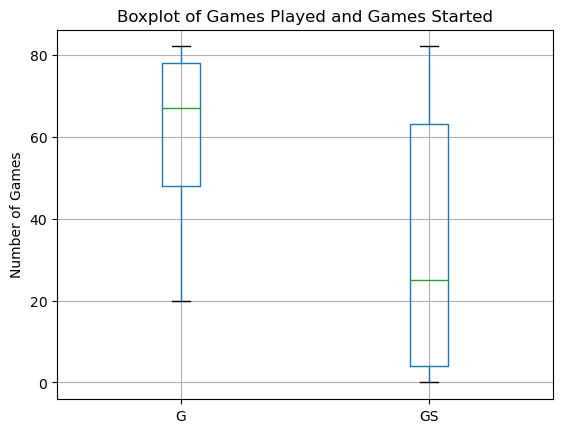

In [7]:
#Games played and games started are important information about how often a player can play in a season and how much the team needs them by start them. Lets visualize them.

g_gs = numerical_df[['G', 'GS']]

g_gs.boxplot()

plt.title('Boxplot of Games Played and Games Started')
plt.ylabel('Number of Games')
plt.show()

We can see that the IQR of games played is around 50s to high 70s, with a median of around 70, meaning that players will usually play majority of the games. However, the IQR of games started is much bigger, from less than 5 games to around 60 games, with a median of around 25 games. This is because firstly new players come in every year and younger and inexperience players will usually have to start as bench first. There are also more bench players than starting players.

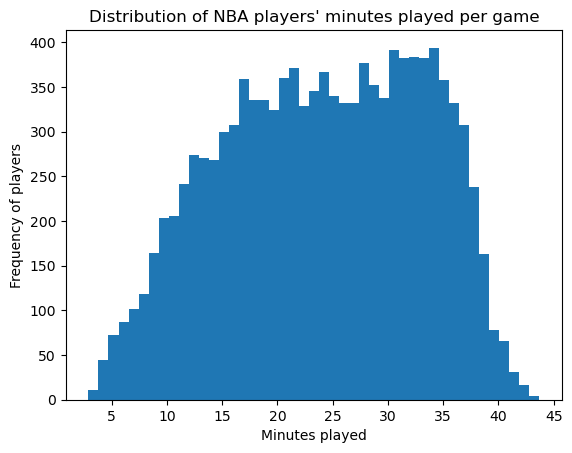

24.073398279796262


In [8]:
# Lets investigate the distribution of "MP", minutes played per game
plt.figure()
numerical_df["MP"].plot(kind = "hist", bins = 45) #I decided to use a box plot for this look at median and interquartile range.
plt.title("Distribution of NBA players' minutes played per game")
plt.xlabel('Minutes played')
plt.ylabel('Frequency of players')
plt.show()
print(numerical_df["MP"].mean())

The MP histogram gives a fairly balanced picture with barely any right/left skew, indicating a normal distribution. The mean and median of minutes played per game is around 24, which is nearly half of 48 minutes (total minutes of a game).

Text(0.5, 1.0, 'Distribution of points scored of NBA players')

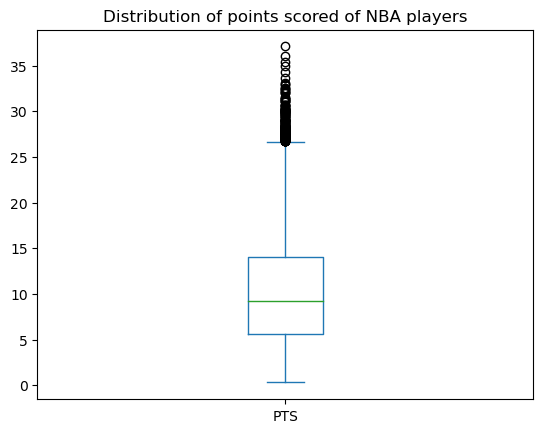

In [9]:
#PTS is points per game, which is one of the most popular measure to define a player, and is most well known by common audiences and is what they used to compare players.Lets investigate it

numerical_df["PTS"].plot(kind = "box")
plt.title('Distribution of points scored of NBA players')


The mean and median of points per game we get from the graph is very low, only around 10 pts per game. This is because we have a lot of bench players in the NBA, with very minimal minutes played. 

Text(0, 0.5, 'Years in NBA')

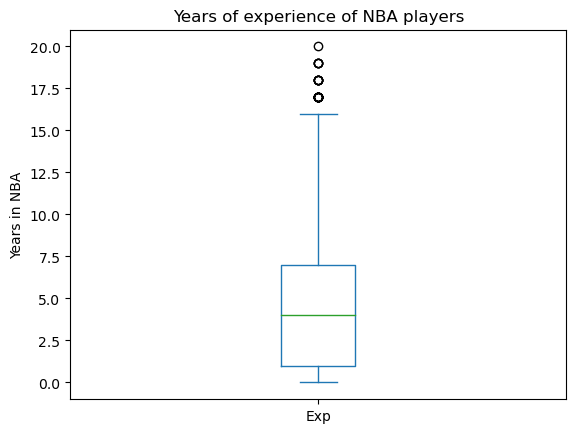

In [10]:
#Lets look at Exp to investigate the distribution of the number of years played by the NBA players.
numerical_df['Exp'].plot(kind='box')
plt.title('Years of experience of NBA players')
plt.ylabel("Years in NBA")

The number of years of NBA players is generally low, with a median of around 4 only, and an IQR of 1 to 7.5 years. Therefore the lifespan of a typical NBA player is usually within the single digits. Very few NBA players were able to play up to 20 years.

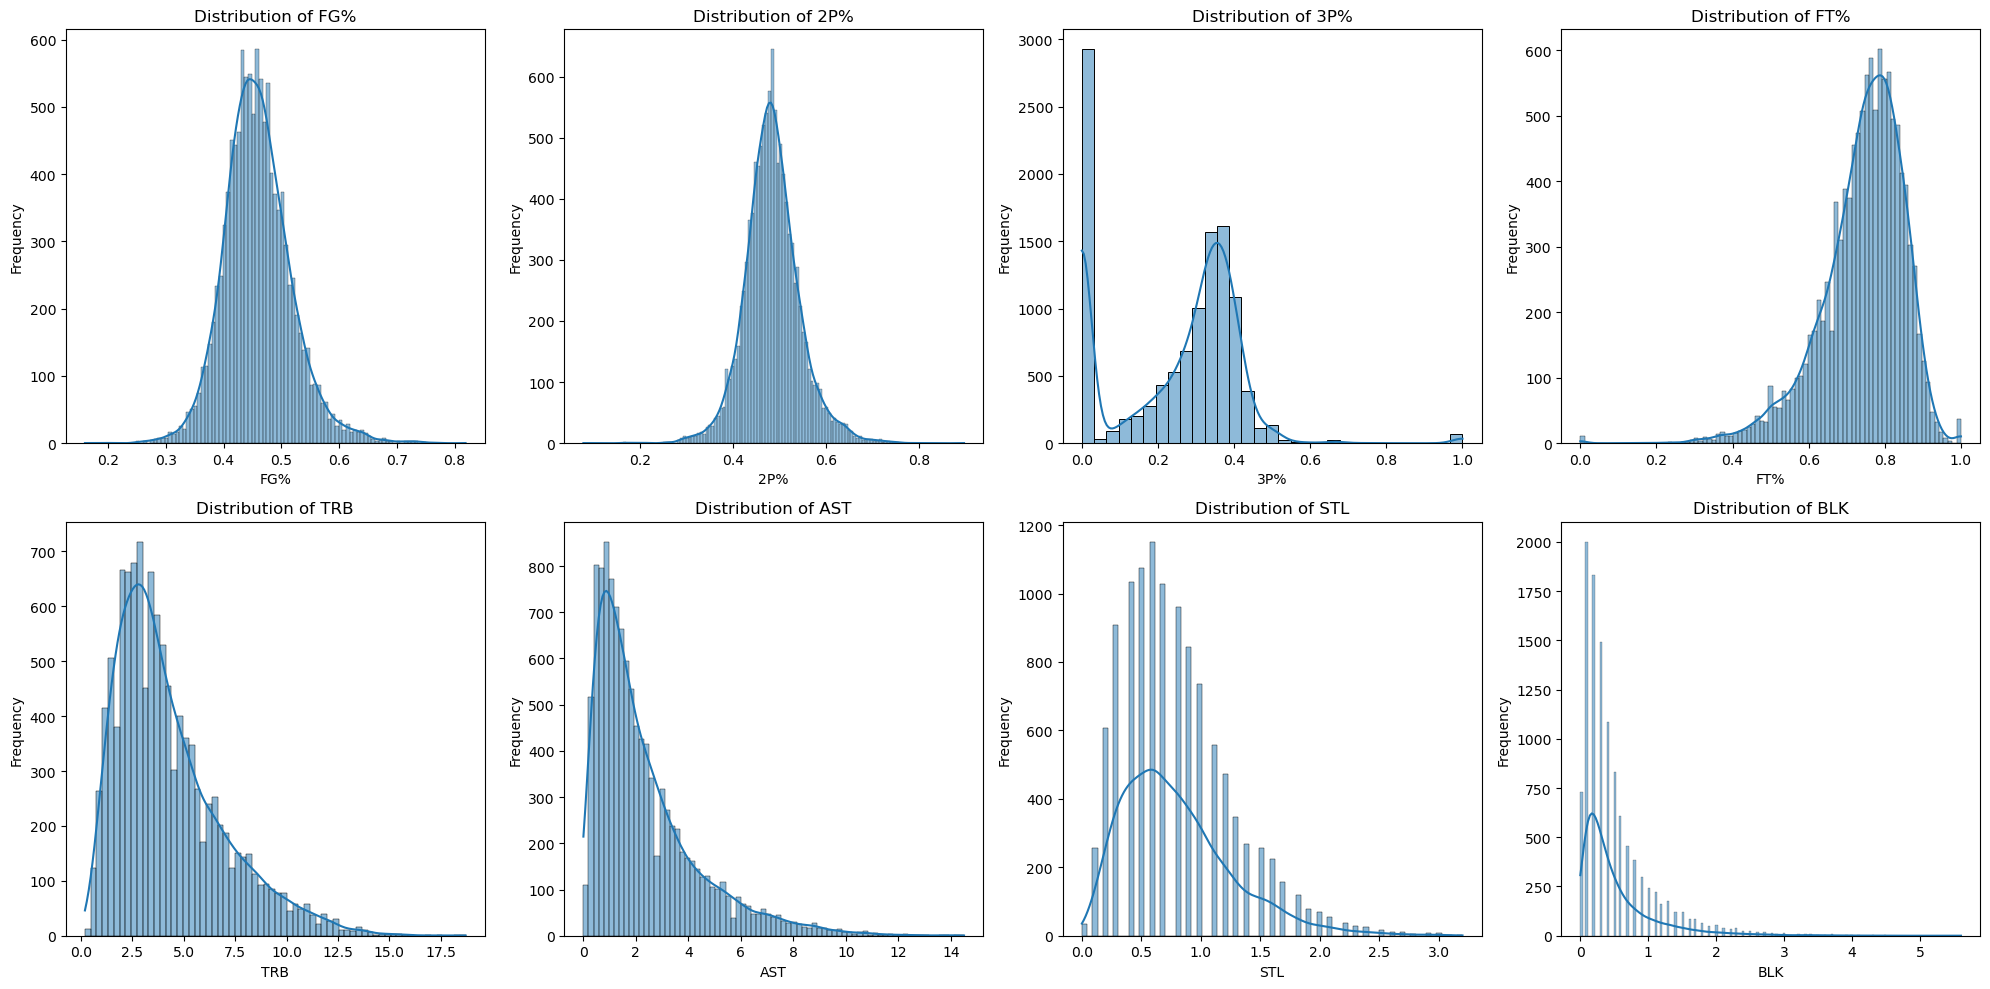

In [11]:
# There are multiple numercial columns that represent players' general box scores, which are stats usually shown in the TV for common audience. I want to use subplots to visualize their
# distribution all at once.
stats = ['FG%', '2P%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK']

plt.figure(figsize=(20, 10))

for i, stat in enumerate(stats, start=1):
    plt.subplot(2, 4, i) 
    sns.histplot(numerical_df[stat], kde=True)
    plt.title(f'Distribution of {stat}')
    plt.xlabel(stat)
    plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

Some noticible observations are, the distribution of FG%, 2P% and 3P% are all very normally distributed, where the mode of FG% is around 45%, 2P% - around 50% and 3P% - 38%. The distribution of FT% is left-skewed, with most lie around 80% FT%. The histograms for TRB, AST, STL and BLK are all right-skewed, indicating them generally the mean is greater than the mode for these common stats in the NBA. 

All the stats we investigated above are useful stats and will be helpful for our topic, however they won't be enough to determine how good a player is. For example points per game of a player indicates how many points they scored, but not necceseraily helping the team win e.g. a player can be using all the opportunies of his team to score himself, but in a very inefficient way that its not helping the team to win, or they can be doing poorly in defense.

Now lets investigate advanced data like PER, WS, WS/48 and BPM. These are usually the best measures to determine a NBA players' influence on a game and is often used to determine NBA MVP and most imnproved player rewards.

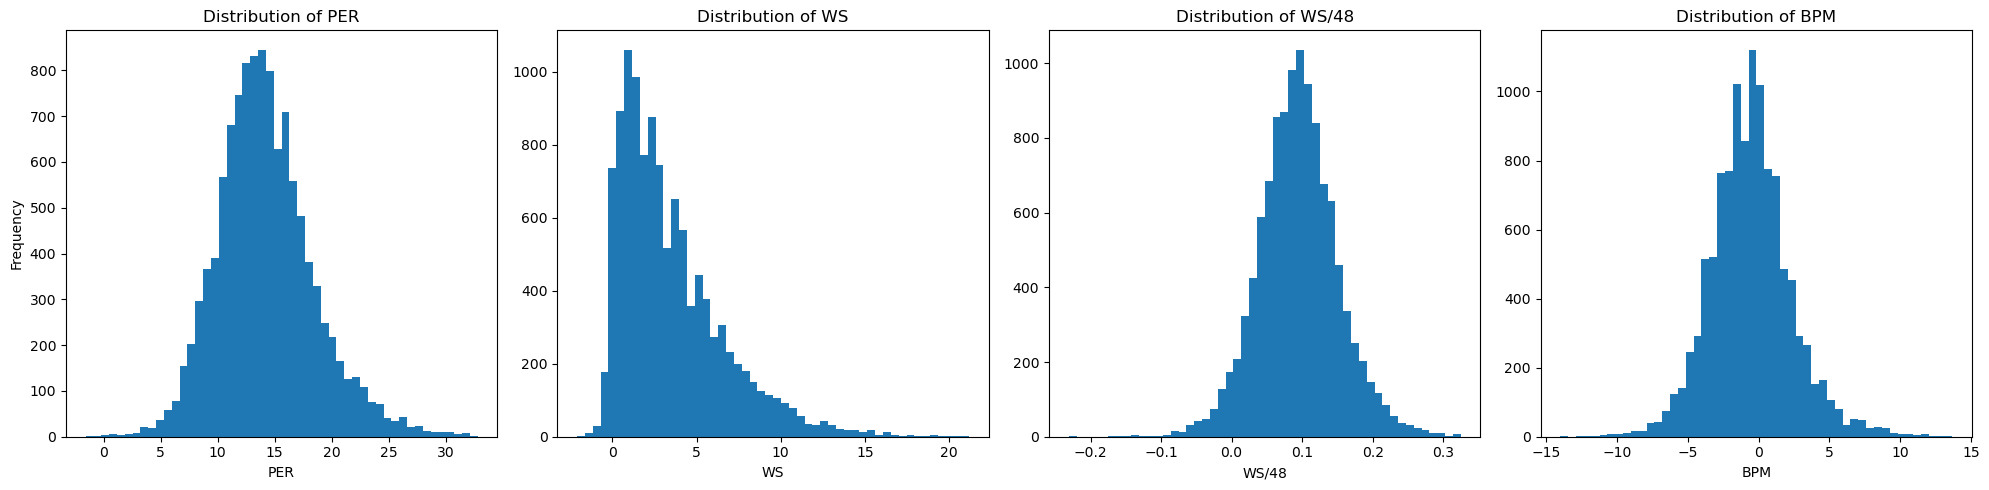

In [12]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)  
plt.hist(numerical_df['PER'], bins=50)
plt.title('Distribution of PER')
plt.xlabel('PER')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)  
plt.hist(numerical_df['WS'], bins=50)
plt.title('Distribution of WS')
plt.xlabel('WS')

plt.subplot(1, 4, 3)  
plt.hist(numerical_df['WS/48'], bins=50)
plt.title('Distribution of WS/48')
plt.xlabel('WS/48')

plt.subplot(1, 4, 4)  
plt.hist(numerical_df['BPM'], bins=50)
plt.title('Distribution of BPM')
plt.xlabel('BPM')

plt.tight_layout()

plt.show()

We can see that "PER", "WS/48" and "BPM" are all normally distributed, while WS is rightskewed.

John Hollinger sets the league average PER to 15.00 every season to standardize the metric. Therefore we would expect the mode and mean at 15 for PER, and a normal distribution. 

As BPM is compare to the league average, with all the players combined together we get a BPM average and mode of 0, hence we get this normal distribution, with mode and mean at 0.

Lets investigate the distribution of our target variable "PER IMPROVEMENT" in our dataframe

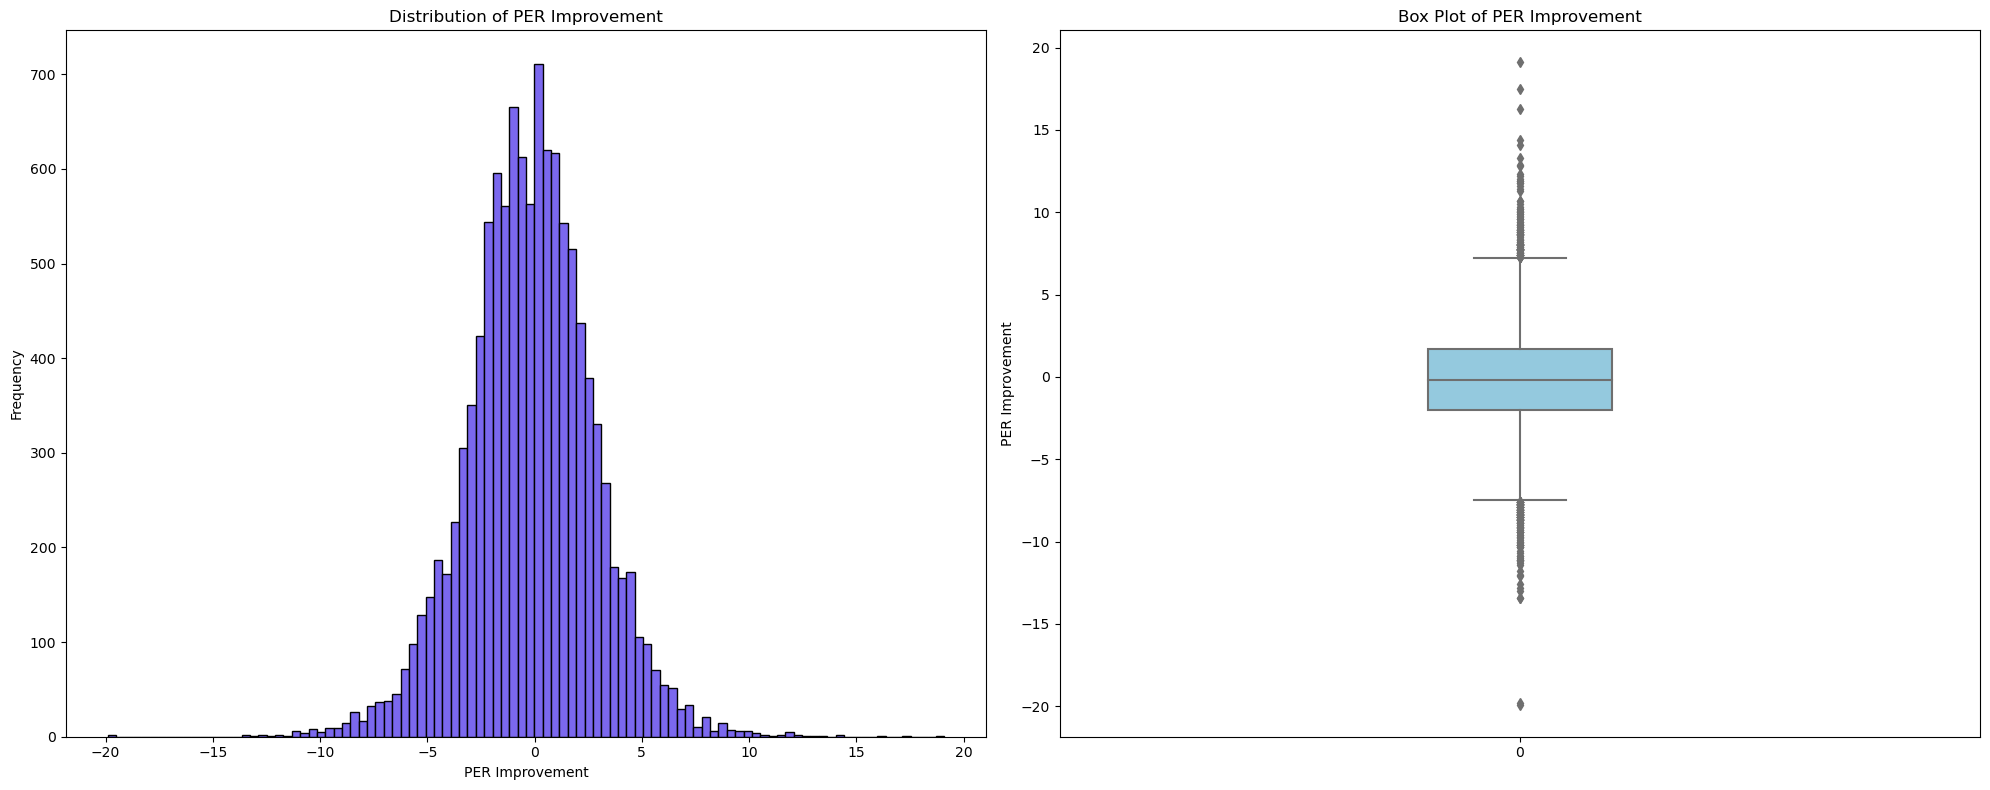

In [13]:
plt.figure(figsize=(20, 8))

# I decided to make 1 histogram and 1 box plot to show the distribution of our target variable

# Histogram
plt.subplot(1, 2, 1)
# Adding color and edge color for better distinction of bins
plt.hist(numerical_df['PER Improvement'], bins=100, color='mediumslateblue', edgecolor='black')
plt.title('Distribution of PER Improvement')
plt.xlabel('PER Improvement')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(numerical_df['PER Improvement'], color='skyblue', width=0.2)
plt.title('Box Plot of PER Improvement')
plt.ylabel('PER Improvement')

plt.tight_layout() 

plt.show()

From our histogram, firstly we can tell the distribution of "PER Improvement" is a normal distribution, and we can see the mode and mean are at 0 or around 0 PER Improvement. A normal distribution is expected because we saw above that the distribution of "PER" is also a normal distribution, as this metric is set around a league average.

Looking at our boxplot, the IQR is very small, it is only around -2 to 2, with a range from -7.5 to 7.5. There are a lot of outliers on both ends. These distribution graphs give me a good idea of the target I am dealing with. With so many data clustered around the small values, it might lead my model to narrow its results. We want to be able to predict the greater PER Improvement values too because we want to be able to find players with great improvement. 

# Bivariate Analysis

I want to first start off with a correlation analysis between our target "PER Improvement" against our features 

In [14]:
from scipy.stats import pearsonr
correlation_matrix = numerical_df.corr()
per_improvement_correlations = correlation_matrix['PER Improvement']
sorted_correlations = per_improvement_correlations.sort_values(ascending=False)

print(sorted_correlations)

PER Improvement                      1.000000
TOV%                                 0.162726
Previous 3PAr average                0.023600
Pos type dummy_G                     0.020470
Previous USG% average                0.018179
Previous TS% average                 0.001926
Previous PTS average                 0.001860
Wt                                   0.000926
Pos type dummy_F                    -0.002070
Previous PER average                -0.004857
3PAr                                -0.005647
Ht_cm                               -0.007932
Previous OBPM average               -0.008544
Previous FG% average                -0.008917
BLK%                                -0.011304
Pos type dummy_C                    -0.022452
STL%                                -0.035045
TRB%                                -0.043044
AST%                                -0.052964
BLK                                 -0.053749
TOV                                 -0.060159
3P%                               

We can see that most of the features are negatively correlated to our target from the correlation test.
Feature columns like Previous PER Improvement, Previous OBPM Improvement, Previous PER Improvement Average, Previous OBPM Improvement Average and WS/48 have the biggest correlation coefficients. This suggests that a worse performance from a player in a season correlates to a bigger improvement potential next season, which makes sense. Previous PER Improvement has the biggest coefficient from the test with -0.4474

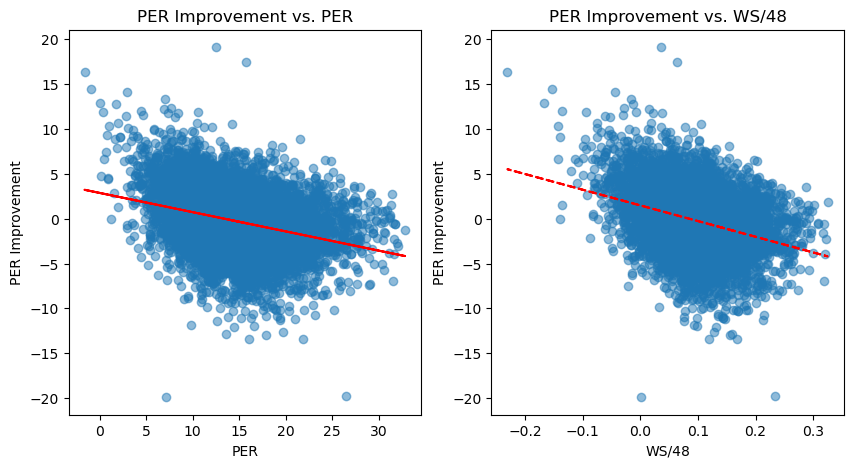

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.scatter(numerical_df['PER'], numerical_df['PER Improvement'], alpha=0.5)

z = np.polyfit(numerical_df['PER'], numerical_df['PER Improvement'], 1) # Adding a trend line and fit into my scatters
p = np.poly1d(z)

plt.plot(numerical_df['PER'], p(numerical_df['PER']), "red")
plt.title('PER Improvement vs. PER')
plt.xlabel('PER')
plt.ylabel('PER Improvement')

plt.subplot(1, 2, 2)  
plt.scatter(numerical_df['WS/48'], numerical_df['PER Improvement'], alpha=0.5)

z = np.polyfit(numerical_df['WS/48'], numerical_df['PER Improvement'], 1)
p = np.poly1d(z)

plt.plot(numerical_df['WS/48'], p(numerical_df['WS/48']), "r--")
plt.title('PER Improvement vs. WS/48')
plt.xlabel('WS/48')
plt.ylabel('PER Improvement')

plt.show()

The hypothesis is that a player with higher overall ability will generally have less improvement. Our scatter graphs support this hypothesis as they are giving a negative relationship between the features and PER Improvement. A player with high PER already would usually be a star player already, meaning they likely already have well developed skillsets or they could be heavily played around by the team already. Therefore their room of improvement is likely little. 

I want to measure PER improvement against Age. I will plot with the top 200 PER improvement data to make my visulization more significant.

In [16]:
sortper_df = numerical_df.sort_values(by='PER Improvement', ascending=False) #Sorting the dataframe in descending order of PER Improvement
top200per = sortper_df.head(200) 

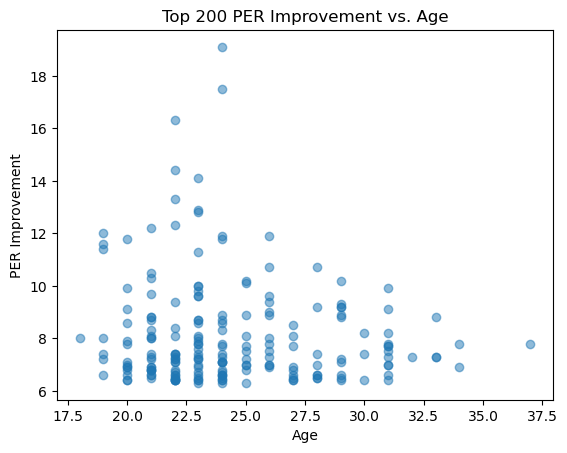

In [17]:
plt.scatter(top200per['Age'], top200per['PER Improvement'], alpha=0.5)

plt.title('Top 200 PER Improvement vs. Age')
plt.xlabel('Age')
plt.ylabel('PER Improvement')
plt.show()

From our visualization, it does show a negative correlation between PER improvement and age. This makes sense as the older a player gets the less athletic he will be. We also see that a lot of the data cluster between the age range of 20 to around 28. This indicates that this age range might be where most of the player development and improvement occur. This can be explained by the fact that as a player enters the NBA, they might be very athletic but they are inexperienced for the NBA. From 20 to late 20 is where a player's experience catches up combining with the peak of their athletism. 30 onwards most of their athletism starts to drop. 

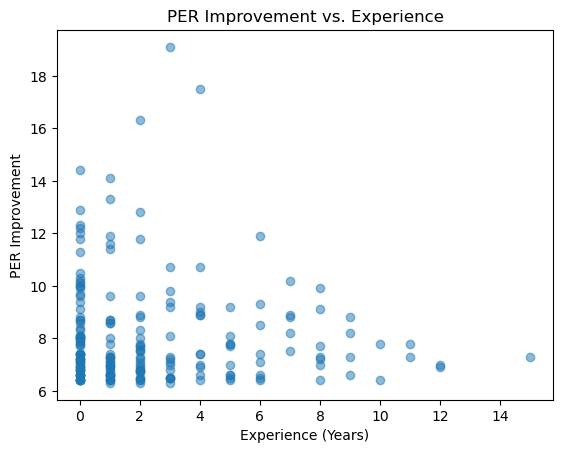

In [18]:
plt.scatter(top200per['Exp'], top200per['PER Improvement'], alpha=0.5)


plt.title('PER Improvement vs. Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('PER Improvement')


plt.show()

A very similar correlation to age, most data is clustered in the lesser experience region, with higher PER improvement too. 

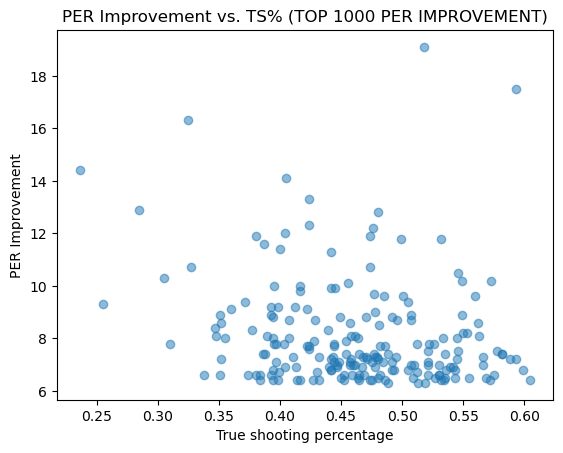

In [19]:
plt.scatter(top200per["TS%"], top200per['PER Improvement'], alpha=0.5)

plt.title('PER Improvement vs. TS% (TOP 1000 PER IMPROVEMENT)')
plt.xlabel('True shooting percentage')
plt.ylabel('PER Improvement')

plt.show()

We can see that true shooting percentage has a negative correlation to a players PER improvement. True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws. I believe the true shooting percentage can give us a good idea of a player's skill, therefore a player with well developed skill is likely to have a smaller improvement room, and players with lower True shooting percentage to start with will have a bigger improvement room. Hence the negative relationship

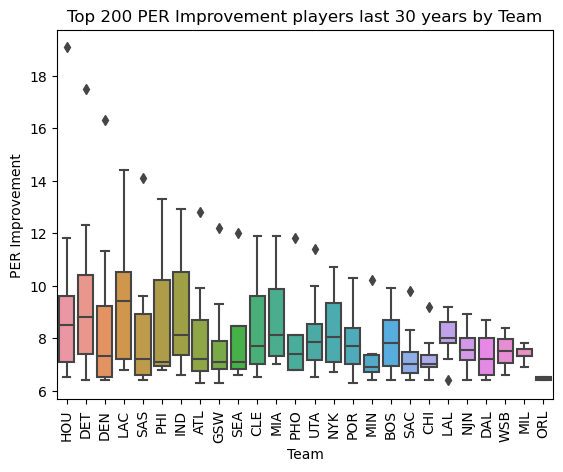

In [20]:
sns.boxplot(x='team', y='PER Improvement', data=top200per) #I decided to use mutiple boxplots to show how different teams produce the TOP PER Improvement players

plt.xticks(rotation=90)

plt.title('Top 200 PER Improvement players last 30 years by Team')
plt.xlabel('Team')
plt.ylabel('PER Improvement')

plt.show()

From the boxplots, we see that SEA produced the most PER improvement in our top 200 PER improvement players, with a median of around 9, followed by the Houston Rockets (HOU) with a median of 8. The Philadelphia 76ers produced the least players, which is 1 player with around 6. 

Teams might have different strategies to build their teams. For example some team would put more focus on developing their own players, while other teams might tend to trading for immediate superstars. This might be interesting as we can investigate how well each team can affect a player's growth.

From my linear regression baseline model, I learnt that PER has a large negative impact on a player's next season's improvement. However, I don't believe it is a linear effect. Therefore, I decided to group the players in my dataframe into groups based on their PER values, and look at their PER improvement for next year, using a violin plot.

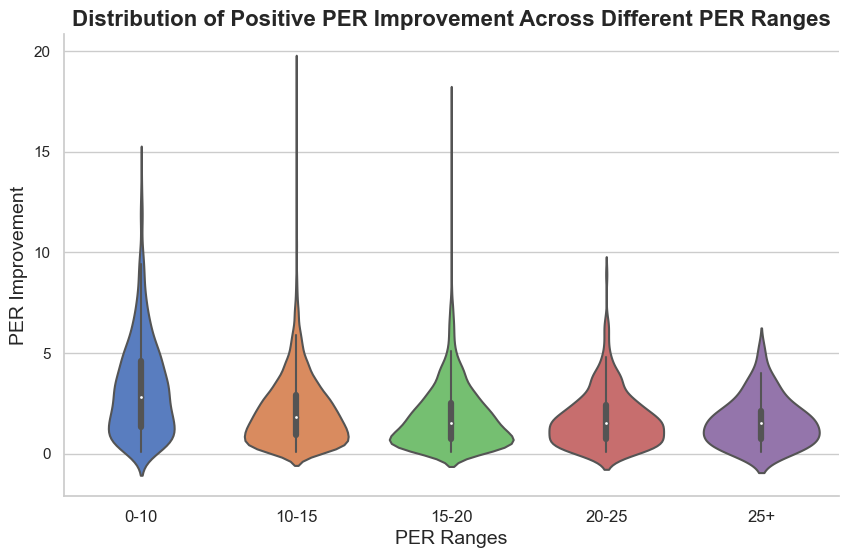

In [23]:
bins = [0, 10, 15, 20, 25, float('inf')] # Categorizing PER into groups first, 0-10, 10-15, 15-20, 20-25 and 25+
labels = ['0-10', '10-15', '15-20', '20-25', '25+']
numerical_df['PER_group'] = pd.cut(numerical_df['PER'], bins=bins, labels=labels, right=False)

filtered_df = numerical_df[numerical_df['PER Improvement'] > 0] # I want to look at only the positive PER improvements, because if I include the negative PER improvements too the values will just cancel each other out resulting near 0.

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='PER_group', y='PER Improvement', data=filtered_df, palette='muted')

ax.set_title('Distribution of Positive PER Improvement Across Different PER Ranges', fontsize=16, fontweight='bold')
ax.set_xlabel('PER Ranges', fontsize=14)
ax.set_ylabel('PER Improvement', fontsize=14)
ax.set_xticklabels(['0-10', '10-15', '15-20', '20-25', '25+'], fontsize=12)

sns.despine()

plt.show()


From our violin plot, we see that players in PER groups of 20-25 and 25+ do have much less PER improvement compare to the lower PER groups, which supports our hypothesis that a player with a higher starting PER value will tend to have less PER improvement next season, because they have less of a improvement room. Players in PER group of 20 or above are typically star/superstar players who have already mastered their skills very well, and already have a high usage in their team.

However, the players who have the most PER improvement are in the 10-15 and 15-20 PER groups, more than the 0-10 group. This shows the PER to PER imrpovement relationship isn't linear. 15-20 PER players are already above league level as the average PER is always set to be 15. Therefore, it shows that players who are average or slightly above average in the first place have a even greater chance of improving more. This makes sense as these players will be given more play time and usage on court compare to the bad players like in the 0-10 group. Therefore from we leant that the players who are likely to improve the most are the average/slightly above average players at the first place.

Next, I want to investigate the PER improvement trends of players over their career. Therefore I decided to pick 1000 random players and plot their PER Improvement across their career years with line graphs.

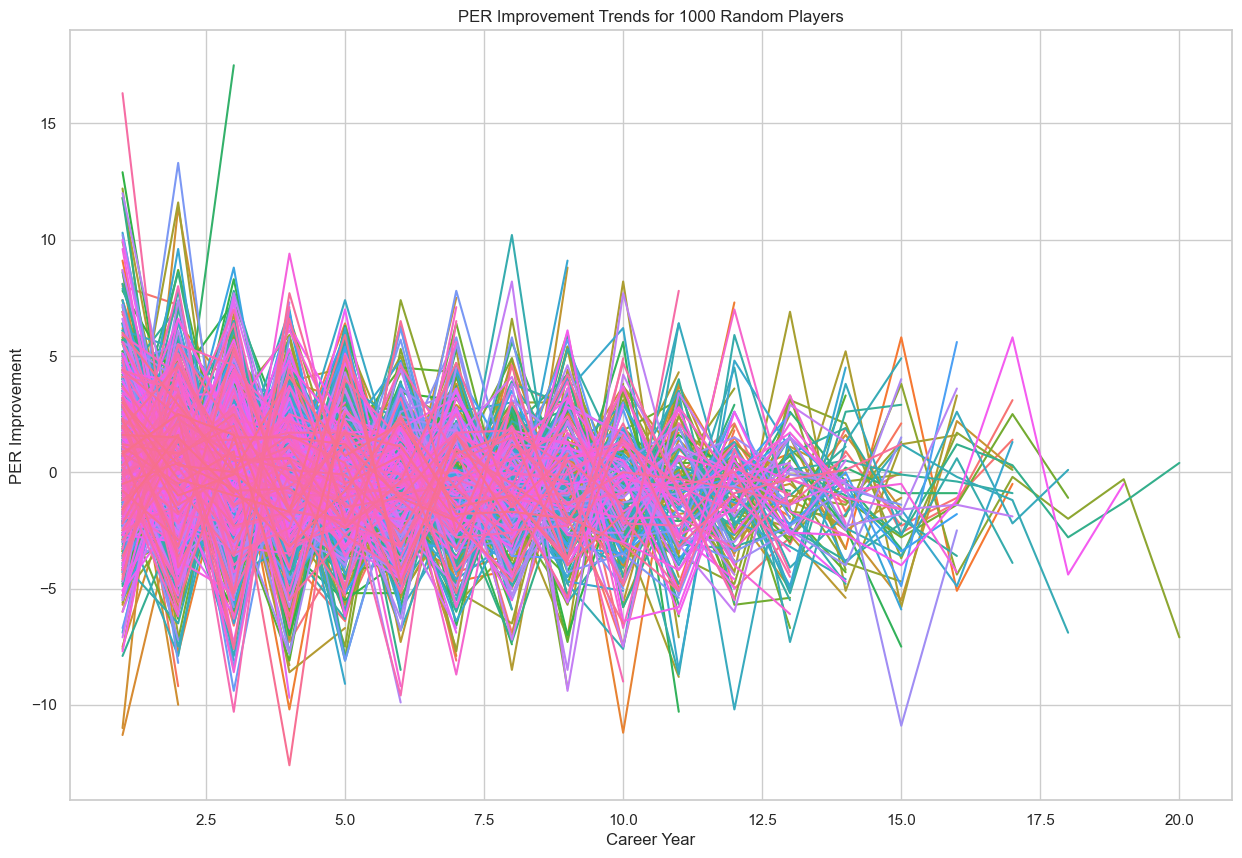

In [22]:
if 'Career_Year' not in numerical_df.columns:
    numerical_df.sort_values(['Player', 'season'], inplace=True) # Sorting players with player names and seasons
    numerical_df['Career_Year'] = numerical_df.groupby('Player').cumcount() + 1

selected_players = np.random.choice(numerical_df['Player'].unique(), 1000, replace=False)  # Select 1000 random players
filtered_df = numerical_df[numerical_df['Player'].isin(selected_players)]


pivot_df = filtered_df.pivot(index='Career_Year', columns='Player', values='PER Improvement')  # Pivot the DataFrame for plotting

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df, dashes=False, legend=None)  # Set legend=None as it's too crowded
plt.title('PER Improvement Trends for 1000 Random Players')
plt.xlabel('Career Year')
plt.ylabel('PER Improvement')
plt.show()

This is a very interesting result as we can see the PER improvement trend of each player is zigzaging through out their career. This shows that why stats like "Previous PER Improvement" are so significant to a players' improvement next year. As a player improved a lot in one season, they are likely to not continue the trend next season, but even decline a bit next season, resulting the zigzaging trend. The more a player improved the more likely they will decline because firstly the improvement might be lucky or temporal. Secondly, when a player improved a lot its likely that they mastered a type of skill or area one season, causing their performance to jump significantly that season. However since they already increased that skill they can't create that same effect anymore next season or they will need to find another area to improve again, which is hard to achieve two seaons in a row.

Our second observation is that the player improvement trend started off bigger with the starting career years, but start to converge as career year increases, resulting less variation and hence less PER improvement. This shows that most of a player's improvement will happen at the start of their career years and with more seasons played, a player will start to stablelise with their performance. Therefore the variance in their PER value will also start to stable.

# Keyinsights

We have some pretty useful EDAs with visualization relating to our target: player improvement.

Distribution of our target "PER Improvement":
We see a normal distribution with mode and mean at 0. From our boxplots we can see the IQR is fairly small, with a range from -2.5 to 5, but we have a lot of outliers.

Target against "PER" and "WS/48":
Features that describe a players overall performance on the court has a negative correlation with "PER Improvement", hinting players that are good already are less likely to improve in general.

Target against "Age" and "EXP":
We learned that most of our top 200 PER improvement players are clustered around the age range of 20 - 28. This indicates the golden age range for players to improve and develop. Teams can use this range to access the potential and ceiling of players, and make decisions to whether keep investing on them or trading them. Experience of years have a negative correlation with player improvement. In general the first few years of a new player in the NBA can indicate the potential of the player. 

Target against "TS%":
TS% had a negative correlation with PER improvement. Since TS% is all about shooting, a player with well developed skill is likely to have a smaller improvement room in the future.

Visualization of player improvement produced by different teams is interesting and we can further explore on how the given team of a player can impact their improvement, as a team that focus on player development more than trading for immediate power can impact a young player more.

Plotting PER improvement against different PER groups show that although there is a negative relationship, the relationship isn't linear. Players with very high PER are star players or superstars so they will be limited in improvement, but the players with the most PER Improvement are usually the average or slightly above average PER groups. This is because these players not only have a big improvement room in their career, but they also have more play time and usage rate, therefore giving them more chance and practice to improve.

The PER Improvement trend of players across their career year show that the player improvement trend follows a zig-zag pattern. Also their improvement converges as they have played more years, resulting less PER improvement variance.